# A t-test report for the stroop effect

## 1. Introduction

The stroop effect is a psychological phenomenon that was demonstrated by a well-designed experiment. A group of participants were timed reading out a list of randomly ordered colour names, first the words is displayed in ink in which they are printed which is called *congruent words condition*, and then the words is displayed in a colour other than the one they name (e.g. the word "red'' in blue ink) which is called  *incongruent words condition*.

## 2. Data

The dataset contains 24 participants in the task and each line contains the time of *congruent words condition* and *incongruent words condition* for each person.

In [1]:
import pandas as pd
data = pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


#### Dependent  and independent variable

The independent variable in this data set is the different way of displaying the word, e.g. whether or not the word was displayed in a colour that match their name. The dependent variable is the time each participants used to finish the task.

#### Simple data vistualization

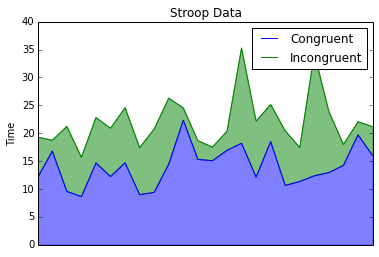

In [10]:
%matplotlib inline 
import pylab as plt
x = range(len(data))
y1 = data['Congruent']
y2 = data['Incongruent']
plt.plot(x, y1,label='Congruent')
plt.plot(x, y2,label='Incongruent')
plt.xlim(x[0],x[-1])
plt.gca().axes.get_xaxis().set_visible(False)
plt.fill_between(x, y1,color='blue',alpha=.5)
plt.fill_between(x, y1,y2,color='green',alpha=.5)
plt.ylabel('Time')
plt.title(r'Stroop Data')
plt.legend()
plt.show()

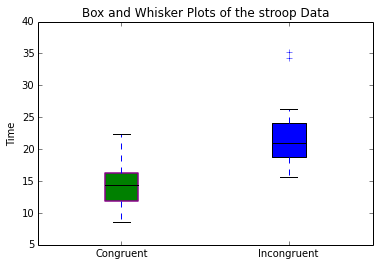

In [11]:
plot = plt.boxplot([y1,y2],               
                    vert=True,       
                    widths = 0.2,  
                    patch_artist=True)

plt.setp(plot['boxes'][0], color='DarkMagenta', 
             linewidth=1.5, 
             facecolor='blue')

plt.setp(plot['boxes'][0], color='DarkMagenta', 
             linewidth=1.5, 
             facecolor='green')

plt.xticks([1,2],               # tick marks
           ['Congruent','Incongruent'] # labels
           )

plt.ylabel('Time')                  # y-axis label
plt.title('Box and Whisker Plots of the stroop Data')  # plot title
plt.show()

A simple observation is shown on the two plots, e.g. the incongruent condition tend to take longer time than the congruent condition. In the rest of the report, we'll perform a statistical test on the dataset.

# 3. Statistical Test 

#### T-test

As shown in the table above, the sample size is {{len(data)}}. It's less than 30.

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
#### Hypothesis

Since it's a dataset of dependent samples. A two-tailed t-test of two dependent samples will be performed.

Null hypothesis is: Shuffling the words by changing their colour other than their names won't change the speed that people recognize th words' colour.

Alternative hypothesis: Shuffling the words by changing their colour other than their names will change the speed that people recognize th words' colour.


To write down as math formulas:

\\(H_{0}: \mu_{c} = \mu_{i}a\\)

$H_{A}: \mu_{c} \neq \mu_{i}$

$\alpha = 0.05$

where $\mu_{c}$ is the average time used when people in congruent condition, and $\mu_{i}$ is the average time used when people in incongruent condition. $\alpha$ is the alpha levels.

# 4. Result

#### Descriptive statistics

In [12]:
import numpy
import math
mean_con = numpy.mean(data['Congruent'])
mean_incon = numpy.mean(data['Incongruent'])
sd_con = numpy.std(data['Congruent'],ddof=1)
sd_incon = numpy.std(data['Incongruent'],ddof=1)
data['diff'] = data['Congruent'] - data['Incongruent']
sd_diff = numpy.std(data['diff'],ddof=1)
sem = sd_diff/math.sqrt(len(data))
print "sample difference:"
data

sample difference:


,Congruent,Incongruent,diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


First, we calculate mean of congruent condition ($mean_{c}$) and standard deviation ($SD_{c}$) , mean of incongruent condition ($mean_{i}$) and standard deviation ($SD_{i}$). $SD_{diff}$ is the standard deviation of the difference between the two conditions.

$mean_{c} = $14.05

$mean_{i} = $22.02

$SD_{c} = $3.56

$SD_{i} = $4.8

$SD_{diff} = $4.86

so, sample error of the mean (SEM) will be:

$SEM = {SD_{diff}\over \sqrt{n}}$ =0.99

#### T-test


In [5]:
t = (mean_con-mean_incon)/sem

We'll get $t_{critical}$ from the t-table and $t_{statistic}$ by the formula below.

$\alpha = $0.05

$t_{critical} = \pm$2.069

$t_{statistic} = {(mean_{c}-mean_{i})\over SEM} =$ -8.021

so, $p-value$<0.05

#### numpy and scipy

In python, t-test on two dependent samples is quite easy with only one function in scipy: *ttest_rel*

In [6]:
from scipy import stats
t, p = stats.ttest_rel(data['Congruent'],data['Incongruent'])

print "t=",t
print "pvalue=",p

t= -8.02070694411
pvalue= 4.10300058571e-08


It returns p-value to us, so again we found that p-value <0.05

#### Critical Region

![Image](dis.png)

#### conclusion

From the t-test result, it's clear that t−statistic < t−critical in the left tail. So the probability that sample means of the two conditions of experiments are the same is so small. Actually, the p-value is about 0.000000041030. We reject the null hypothesis. It means that shuffling the words by changing their colour other than what their name is will significantly slow down participants' recognition of these words. The cause of this phenomenon may be because of the different area in brain to process recognizing colour and reading words. When there is a conflict, the brain will have to take extra time to finish the task.

#### Further statistics

1\. Standardised mean difference

In [7]:
cohen = (mean_con-mean_incon)/sd_diff

$Cohen's d = {(\overline x-\mu)\over SD_{diff}} = $ -1.64


2\. Correlation measures

In [8]:
r2 = (t**2)/(t**2+len(data)-1)

$r^2 =  {(t_{statistic}\;)\over SD_{diff}} = $ 0.74

This means 74% of the different performance inthe two conditions of experiment are due to the shuffling of the words by colour.

3\. Confidence interval

In [9]:
margin = 2.064*sem
low = (mean_con-mean_incon)-margin
up = (mean_con-mean_incon)+margin

The 95% of the confidence interval is (-10.01, -5.92), margin of error is 2.05

# 5. Discussion

Based on the dataset of the stroop effect experiment, we did a t-test and proved that the participants performed significantly different in two conditions and the psychological phenomenon may due to the brain activity or other biology behaviors. With the help of modern medicine, the electroencephalogram may help identify the different area of the brain that the participants used on the two experimental condiitions.

We can also think of other similar effect like how the misspell of word affect readding. We can design a experiment to let participants read different sentences with or without misspelled words to measure the time them used. It would be fun.